In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
empirical_file_path = "../data/notes.xlsx"
emp_excel_file = pd.ExcelFile(empirical_file_path)
emp_sheet_names = emp_excel_file.sheet_names
df = pd.read_excel(empirical_file_path, sheet_name='empirical_simple')

In [3]:
err_df = df[['Age #1', 'source', 'Practice']]
err_df_pct = df[['Age #1', 'source', 'Practice']]

err_df.loc[:,'FVS'] = df['FVS'] - df['Mg-C-ha']
err_df_pct['FVS'] = (df['FVS'] - df['Mg-C-ha']) / df['Mg-C-ha'] * 100

err_df['Comet'] = df['Comet'] - df['Mg-C-ha']
err_df_pct['Comet'] = (df['Comet'] - df['Mg-C-ha']) / df['Mg-C-ha'] * 100

err_df['iTree Planting (FS)'] = df['iTree Planting (FS)'] - df['Mg-C-ha']
err_df_pct['iTree Planting (FS)'] = (df['iTree Planting (FS)'] - df['Mg-C-ha']) / df['Mg-C-ha'] * 100

err_df['iTree Eco'] = df['iTree Eco'] - df['Mg-C-ha']
err_df_pct['iTree Eco'] = (df['iTree Eco'] - df['Mg-C-ha']) / df['Mg-C-ha'] * 100

/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_34589/3194365115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  err_df.loc[:,'FVS'] = df['FVS'] - df['Mg-C-ha']
/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_34589/3194365115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  err_df_pct['FVS'] = (df['FVS'] - df['Mg-C-ha']) / df['Mg-C-ha'] * 100
/var/folders/py/9t078qzs52x65tkpvg23_4mc0000gn/T/ipykernel_34589/3194365115.py:7: SettingWithCopyWarning: 
A value is trying to be set on 

# Percentage error results

In [4]:
plot_df = err_df_pct.copy().drop(['source','Practice',"Age #1"], axis = 1) 

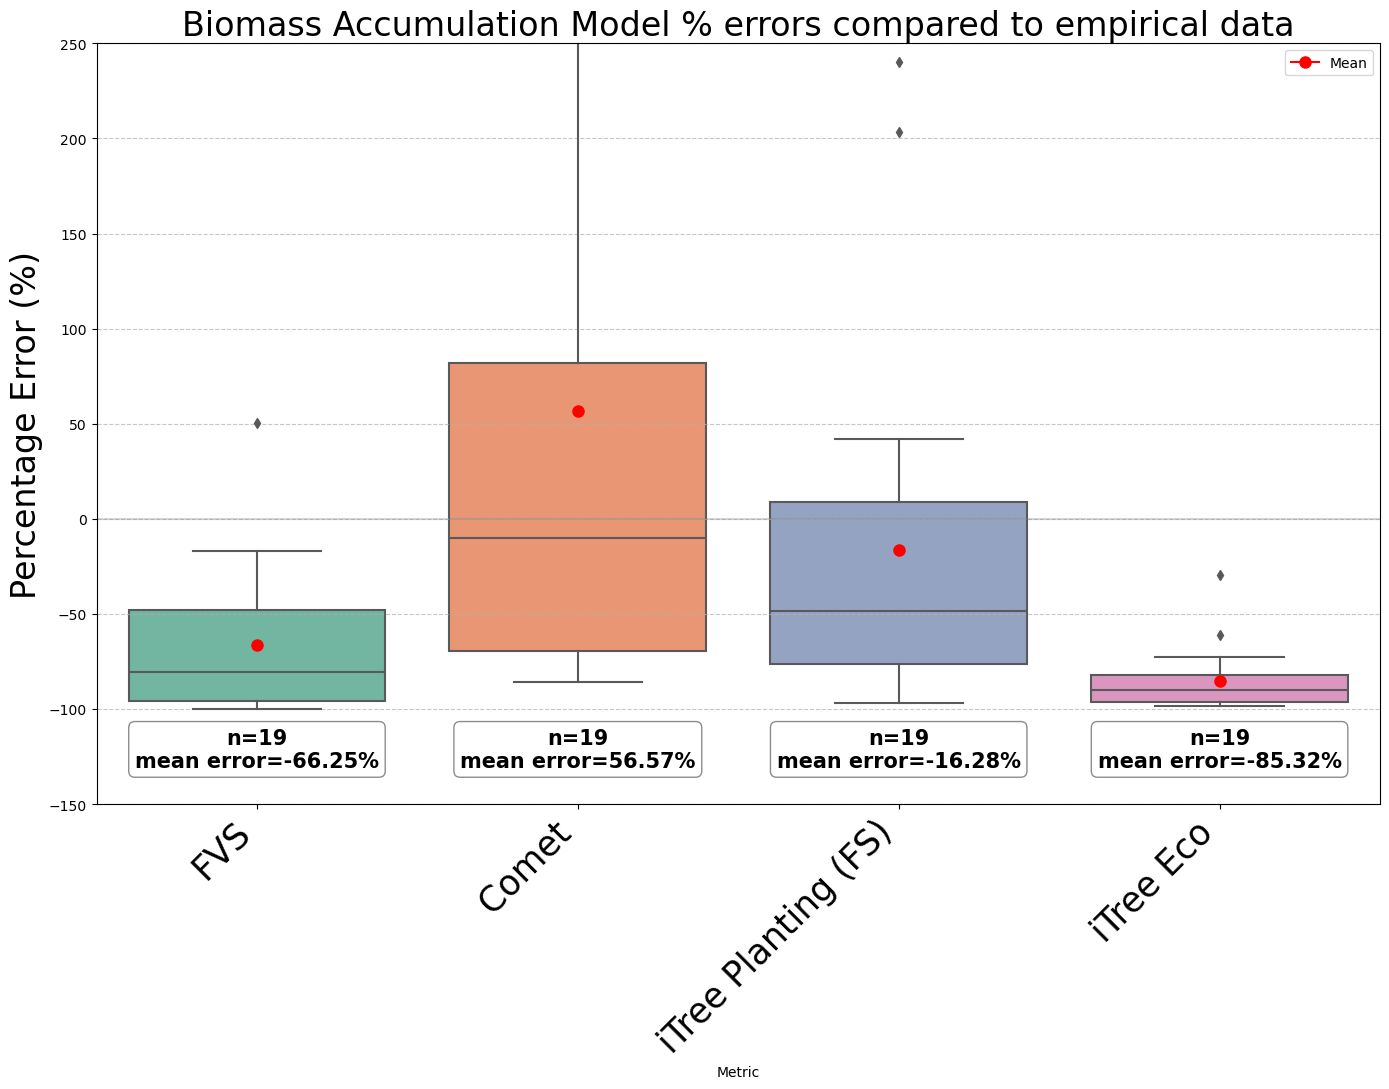

In [5]:
# Calculate means, standard errors, and count non-NA values for each column
means = plot_df.mean()
n_obs = plot_df.count()   # Count non-NA values per column

# Prepare data for plotting in long format
plot_data = plot_df.melt(var_name='Metric', value_name='Percentage')

# Find the global min and max for better y-axis limits
global_min = plot_data['Percentage'].min()
global_max = plot_data['Percentage'].max()
data_range = global_max - global_min

# Create a figure with a larger size
plt.figure(figsize=(14, 11))  # Increased height to accommodate labels

# Create the boxplot
ax = sns.boxplot(x='Metric', y='Percentage', data=plot_data, palette="Set2")

# Add mean points on the boxplot
for i, col in enumerate(plot_df.columns):
    ax.plot(i, means[col], marker='o', color='red', markersize=8, label='Mean' if i == 0 else "")

# Set y-axis limits with extra padding
padding = data_range * 0.3  # Increased padding for labels
# plt.ylim(global_min - padding, global_max + data_range * 0.1)
plt.ylim(-150,250)

# Create small annotation boxes inside the plot area
for i, col in enumerate(plot_df.columns):
    # Get column data without NAs
    col_data = plot_df[col].dropna()
    
    # Skip if no data
    if len(col_data) == 0:
        continue
    
    # Calculate position for stats box - position in the lower part of the plot
    # but inside the plot boundaries
    stats_y_pos = global_min - padding * 0.1  # Position within the padding area
    
    # Create a more compact format for the stats box
    stats_text = f'''n={n_obs[col]}
mean error={means[col]:.2f}%'''
    
    # Add the text with a more compact box
    ax.text(i, stats_y_pos, stats_text, 
            ha='center', va='center', fontsize=15, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', 
                     boxstyle='round,pad=0.3', linewidth=1))

# Set labels and title
plt.ylabel('Percentage Error (%)', fontsize=24)
plt.title('Biomass Accumulation Model % errors compared to empirical data', fontsize=24)

# Add a legend for the mean point
plt.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=25)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a subtle horizontal line at y=0 for reference
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Absolute error results

In [6]:
plot_df = err_df.copy().drop(['source','Practice',"Age #1"], axis = 1) 

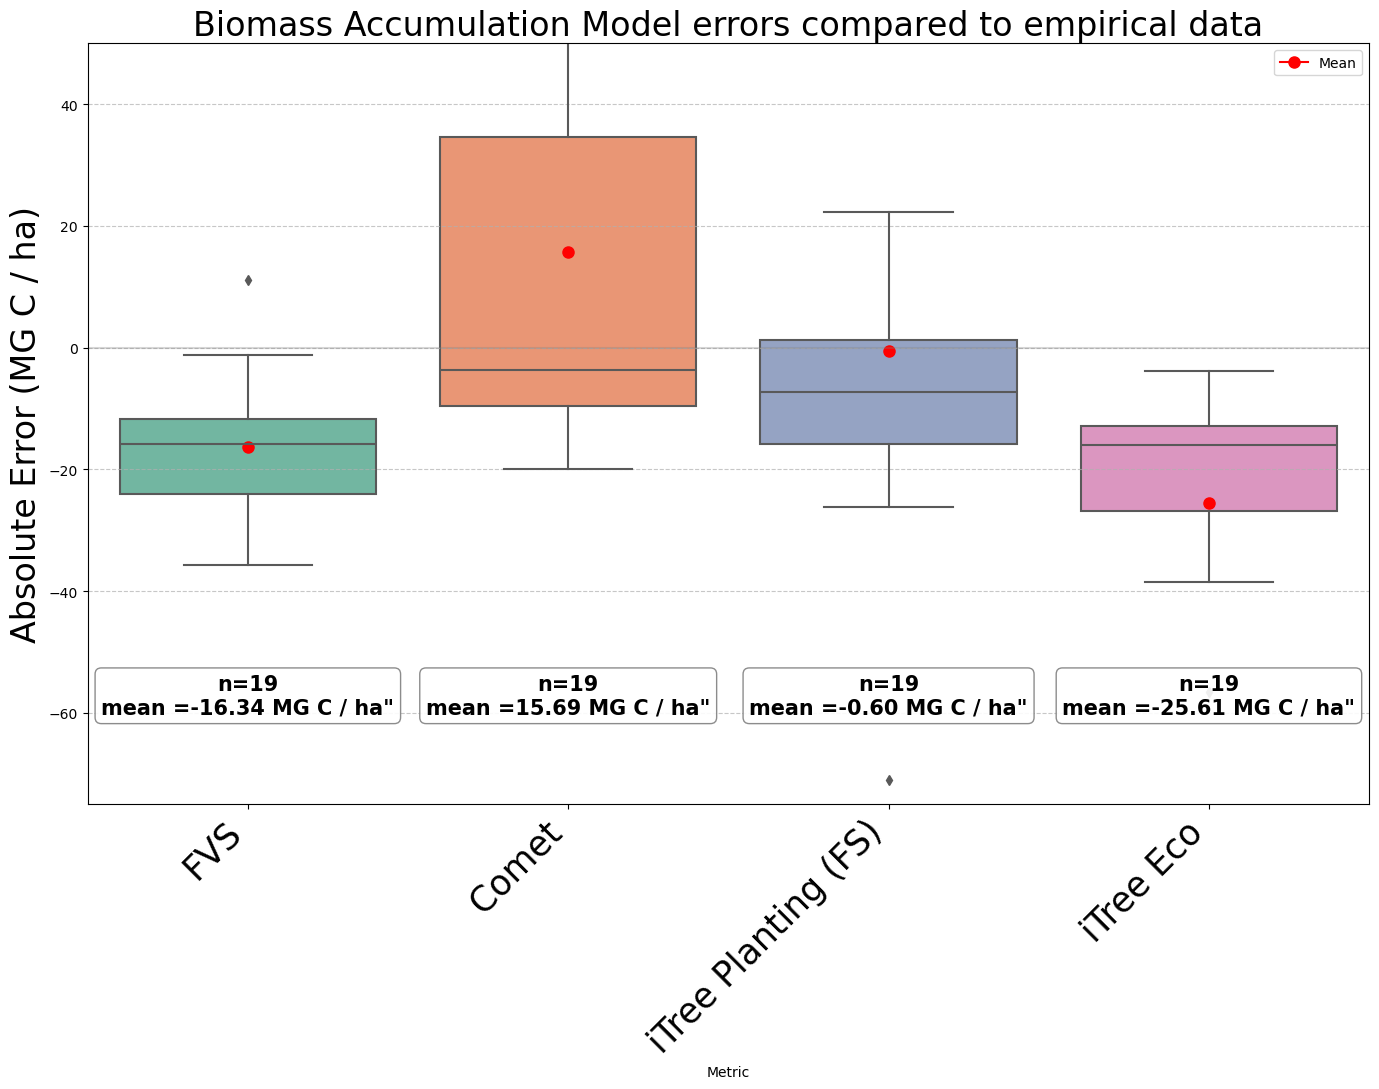

In [17]:
# Calculate means, standard errors, and count non-NA values for each column
means = plot_df.mean()
n_obs = plot_df.count()   # Count non-NA values per column

# Prepare data for plotting in long format
plot_data = plot_df.melt(var_name='Metric', value_name='Error')

# Find the global min and max for better y-axis limits
global_min = plot_data['Error'].min()
global_max = plot_data['Error'].max()
data_range = global_max - global_min

# Create a figure with a larger size
plt.figure(figsize=(14, 11))  # Increased height to accommodate labels

# Create the boxplot
ax = sns.boxplot(x='Metric', y='Error', data=plot_data, palette="Set2")

# Add mean points on the boxplot
for i, col in enumerate(plot_df.columns):
    ax.plot(i, means[col], marker='o', color='red', markersize=8, label='Mean' if i == 0 else "")

# Set y-axis limits with extra padding
padding = data_range * 0.3  # Increased padding for labels
# plt.ylim(global_min - padding, global_max + data_range * 0.1)
plt.ylim(-75,50)

# Create small annotation boxes inside the plot area
for i, col in enumerate(plot_df.columns):
    # Get column data without NAs
    col_data = plot_df[col].dropna()
    
    # Skip if no data
    if len(col_data) == 0:
        continue
    
    # Calculate position for stats box - position in the lower part of the plot
    # but inside the plot boundaries
    stats_y_pos = global_min + padding *0.75   # Position within the padding area
    
    # Create a more compact format for the stats box
    stats_text = f'''n={n_obs[col]}
mean ={means[col]:.2f} MG C / ha'''
    
    # Add the text with a more compact box
    ax.text(i, stats_y_pos, stats_text, 
            ha='center', va='center', fontsize=15, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray', 
                     boxstyle='round,pad=0.3', linewidth=1))

# Set labels and title
plt.ylabel('Absolute Error (MG C / ha)', fontsize=24)
plt.title('Biomass Accumulation Model errors compared to empirical data', fontsize=24)

# Add a legend for the mean point
plt.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=25)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a subtle horizontal line at y=0 for reference
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()